# Customer Segmentation Analysis


### Project Description:  The aim of this data analytics project is to perform customer segmentation analysis for an e-commerce company. By analyzing customer behavior and purchase patterns, the goal is to group customers into distinct segments. This segmentation can inform targeted marketing strategies, improve customer satisfaction, and enhance overall business strategies.


### Dataset Link: https://www.kaggle.com/code/analystoleksandra/marketing-analytics-customer-segmentation?scriptVersionId=148503162&cellId=6


#### 1. Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 2. Load the dataset 

In [2]:
df = pd.read_csv('ifood_df.csv')  
df.head() # Display the first 5 rows

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [3]:
df.info()  # Display basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

#### 3. Data Cleaning: Handling missing values

In [4]:
df.isnull().sum()  # Checking for missing values

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

Insights: There is no missing values in the dataset.

In [5]:
df.nunique() # To check the unique values in each column

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

#### 4. Descriptive Statistics

In [7]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [8]:
# Calculate key metrics such as average purchase value, frequency of purchases, etc.

avg_purchase_value = df['MntTotal'].mean()
purchase_frequency = df[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'NumDealsPurchases']].sum(axis=1).mean()

print(f"Average Purchase Value: {avg_purchase_value}")
print(f"Purchase Frequency: {purchase_frequency}")

Average Purchase Value: 562.7646258503402
Purchase Frequency: 14.88798185941043


#### 5. Visualization


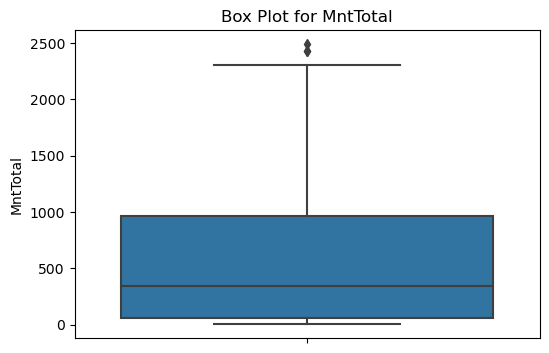

In [9]:
# Box plot for the total amount spent on all products (MntTotal)

plt.figure(figsize=(6, 4))  
sns.boxplot(data=df, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

Insights: The box plot spotted a few outliers in the MntTotal.

In [10]:
# Outliers


Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [11]:
# Outliers removal

df = df[(df['MntTotal'] > lower_bound) & (df['MntTotal'] < upper_bound)]
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


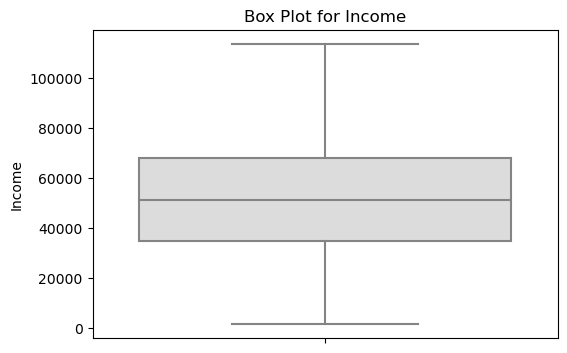

In [12]:
# Box plot for income

plt.figure(figsize=(6, 4))  
sns.boxplot(data=df, y='Income', palette='coolwarm')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

Insights: Income distribution is close to normal distribution with no outliers.

#### 6. Feature Engineering

Creating a new 'marital' column by combining five existing columns, assigning values: Divorced, Married, Single, Together, Widow.

Text(0, 0.5, 'MntTotal')

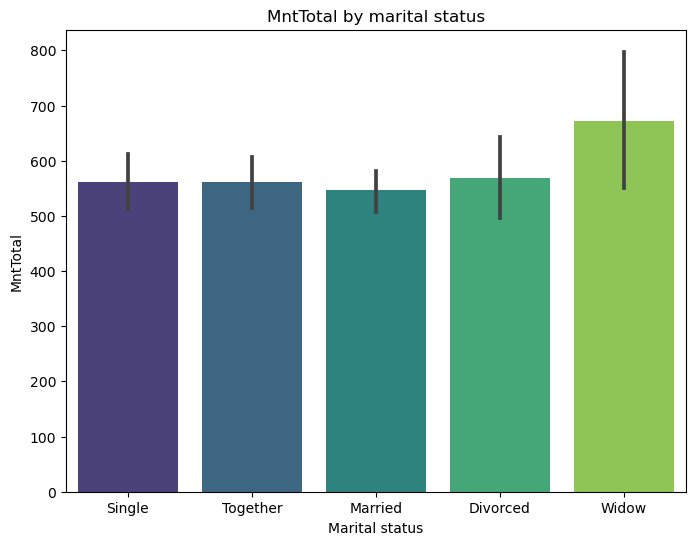

In [13]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
df['Marital'] = df.apply(get_marital_status, axis=1)


plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', data=df, palette='viridis')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

Insights: Widowed individuals spend the most.

Divorced spend slightly more than Single, Together and Married.

Married spend the least but differences are small.

Marital status influences spending, with widowed individuals spending the highest.

In [14]:
# There are 3 features that reflect if a person is single (Single, Divorced, Widow).
# 2 features if a person is in relationship (Together, Married). 
# We will add an additional feature 'In_relationship'. 
#This feature will equal 1 if a customer's marital status is 'Married' or 'Together' and 0 in all other cases.


def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
df['In_relationship'] = df.apply(get_relationship, axis=1)
df.head()    

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,1


#### 7. K-Means Clustering

K-means clustering is a machine learning method that groups similar data points together. It works well with large datasets.  

Key steps:

Standardizing data: Making data uniform for better clustering.  
PCA (Principal Component Analysis): Reducing data complexity while keeping important patterns.  
Elbow method: Finding the best number of clusters by checking where adding more stops improving results.  
Silhouette score: Measuring how well data points fit into their assigned clusters.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#### 7.1 Standardizing data


In [16]:
scaler = StandardScaler()

# Standardizing numerical features for clustering (selected for Income, spending power, recency, and In_relationship)

cols_for_clustering = ['Income', 'Recency', 'In_relationship','MntTotal']
df_scaled = df.copy()
df_scaled[cols_for_clustering] = scaler.fit_transform(df[cols_for_clustering])
df_scaled[cols_for_clustering].describe()

,Income,Recency,In_relationship,MntTotal
count,2.202000e+03,2.202000e+03,2.202000e+03,2.202000e+03
mean,2.742785e-17,3.952838e-17,-4.678869e-17,-8.873717e-17
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.410685e+00,-1.694034e+00,-1.348874e+00,-9.724232e-01
25%,-7.926475e-01,-8.646643e-01,-1.348874e+00,-8.815089e-01
50%,-1.508040e-02,-7.375941e-04,7.413589e-01,-3.806058e-01
75%,8.017617e-01,8.631892e-01,7.413589e-01,7.024988e-01
max,3.006747e+00,1.727116e+00,7.413589e-01,3.048788e+00


Insights: After scaling, all features have a mean close to 0 and a standard deviation of 1, ensuring comparability in clustering.

#### 7.2 PCA

In [17]:
# Principal Component Analysis (PCA)

# PCA takes the original features (dimensions) and create new features that capture the most variance of the data.

from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(df_scaled[cols_for_clustering])
df_scaled['pc1'] = pca_res[:,0]
df_scaled['pc2'] = pca_res[:,1]

#### 7.3 Elbow Method

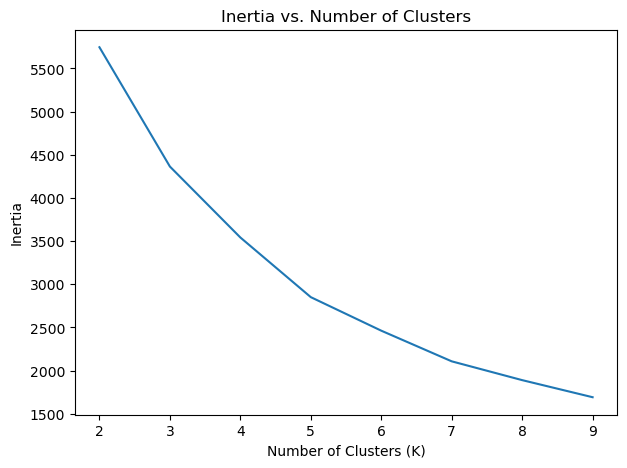

In [18]:
# Elbow method

# To determine the optimal number of clusters (K) for K-means clustering algorithm.

X = df_scaled[cols_for_clustering]    # Selecting the standardized features for clustering  

inertia_list = []    # Initializing an empty list to store inertia values for different K values  

for K in range(2,10):
    
    # Apply K-Means clustering and compute inertia (sum of squared distances to the nearest cluster center)  
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)
    
plt.figure(figsize=[7,5])

# Plot inertia values against the number of clusters (Elbow Method)  
plt.plot(range(2,10), inertia_list)
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

Insights: Elbow method suggests 4 or 5 clusters, which balances accuracy and simplicity, ensuring meaningful data segmentation.

#### 7.4 Silhouette score

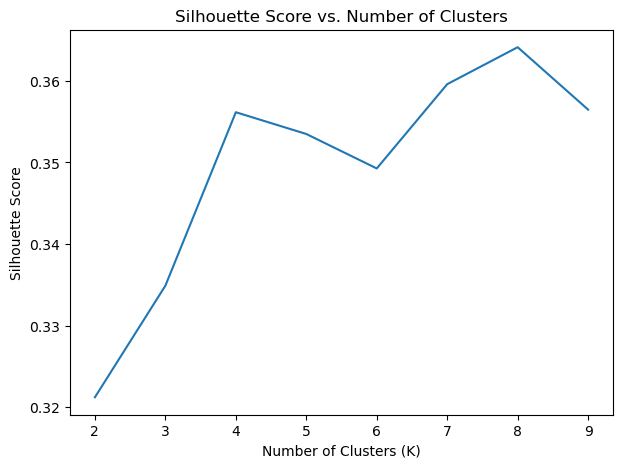

In [19]:
# Silhouette score analysis

# A higher silhouette score indicates that the clusters are well-separated, 
# while a lower score suggests that the clusters may overlap or are poorly defined.

silhouette_list = []   # Initialize an empty list to store silhouette scores for different values of K

for K in range(2,10):
    
    # Create a K-Means model with K clusters and a fixed random state for reproducibility
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    
    # Compute the silhouette score for the current clustering configuration
    s_avg = silhouette_score(X, clusters)
    
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list)
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [20]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(df_scaled[cols_for_clustering])
df_scaled['Cluster'] = model.predict(df_scaled[cols_for_clustering])

#### 8. Clustered Visualization

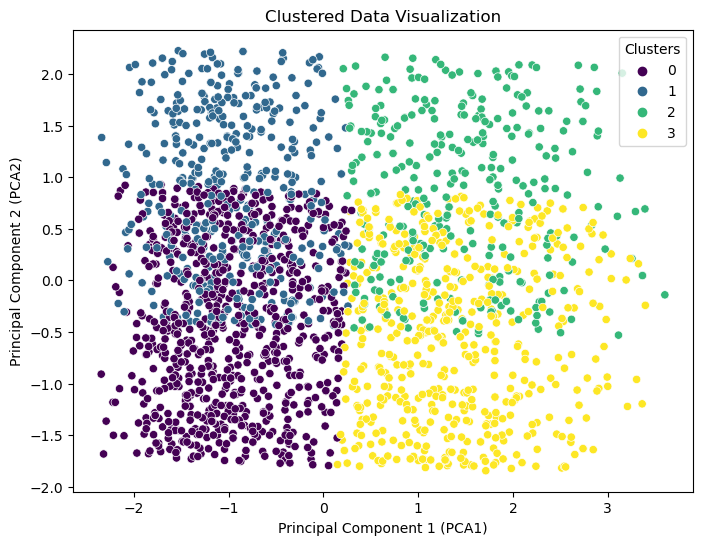

In [21]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='pc1', y='pc2', data=df_scaled, hue='Cluster', palette='viridis')

plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.legend(title='Clusters')

plt.show()

In [22]:
df['Cluster'] = df_scaled.Cluster
df.groupby('Cluster')[cols_for_clustering].mean()

,Income,Recency,In_relationship,MntTotal
Cluster,,,,
0,37915.921637,49.615205,1.0,157.909942
1,37076.618304,47.410714,0.0,147.303571
2,71770.462462,51.246246,0.0,1149.117117
3,71784.031802,48.090106,1.0,1148.208481


#### 8.1 Mean consumption of different product types by cluster

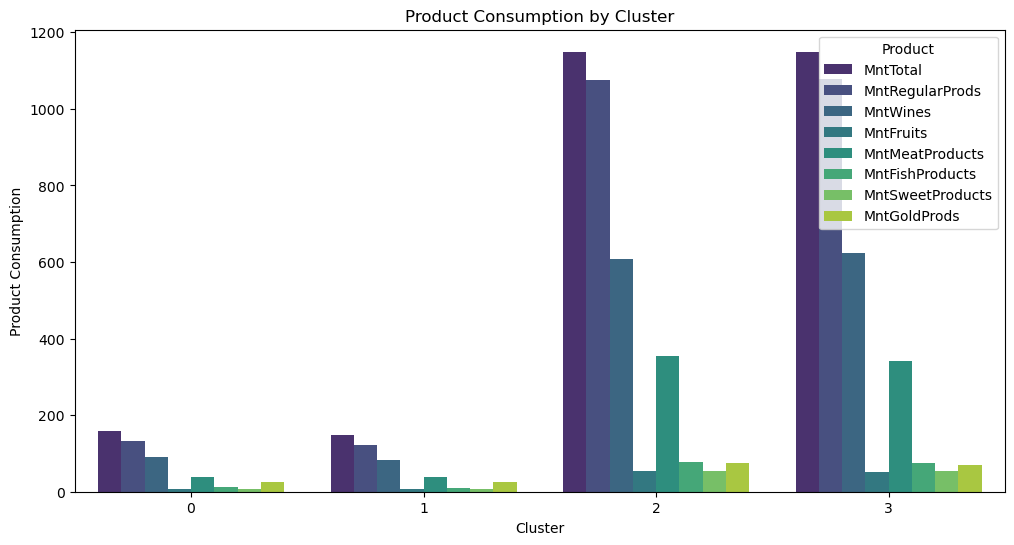

In [24]:
cols_mnt = ['MntTotal','MntRegularProds','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
mnt_df = df.groupby('Cluster')[cols_mnt].mean().reset_index()

melted_df = pd.melt(mnt_df, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_df, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")
plt.show()

#### 8.2 Cluster sizes

Text(0, 0.5, 'MntTotal')

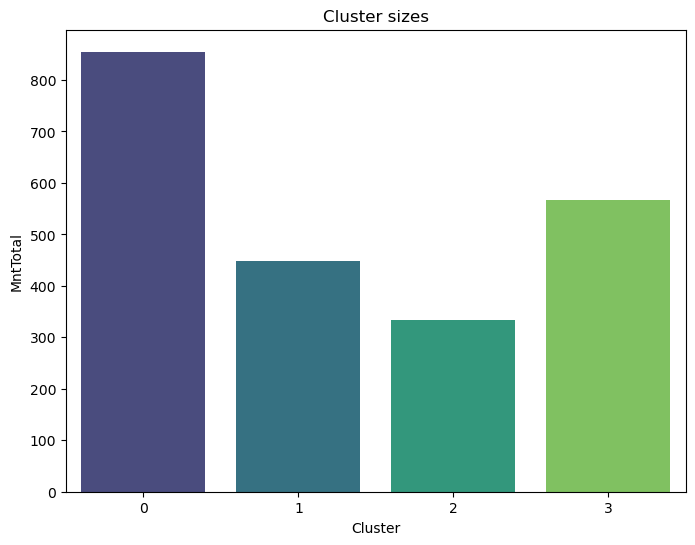

In [25]:
cluster_sizes = df.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

#### 8.3 In_relationship feature by cluster

Text(0, 0.5, 'In_relationship')

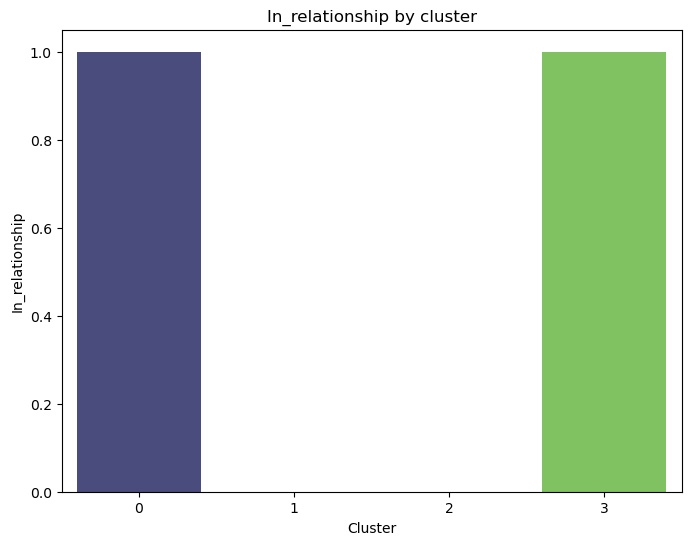

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_relationship', data=df, palette='viridis')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship')

#### 8.4 Bar plot for cluster distribution

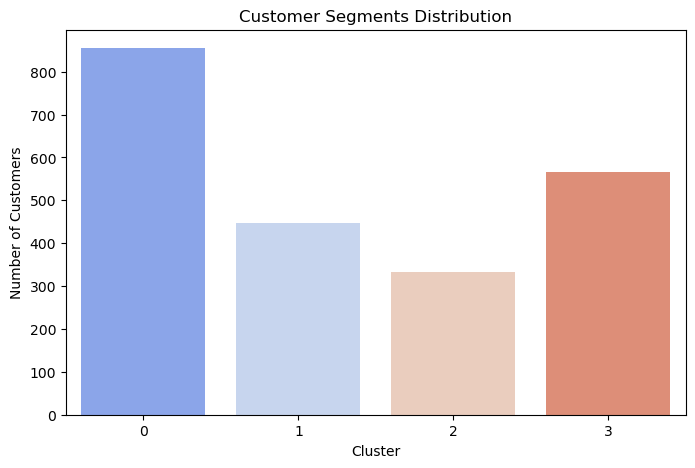

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df, palette='coolwarm')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Customer Segments Distribution')
plt.show()

#### 9.1  Results and Insights

Clusters 2 and 3 have the highest income and highest spending. Clusters 0 and 1 have lower income and lower spending.

Higher income leads to higher spending, but spending varies even among those with similar income.

Widowed individuals spend the most, followed by divorced individuals.

Cluster 0 and 3 have more people in relationships, while Cluster 1 and 2 mostly consist of single individuals.

Being "In a Relationship" does not significantly impact spending patterns compared to income levels.

Cluster 2 and 3 (high-income, high-spending) contribute the most to sales.

Cluster 0 and 1 spend significantly less, showing potential for targeted marketing.

#### 9.2  Recommendation

Target Clusters 2 and 3 with premium products and exclusive loyalty programs to maximize revenue.

Use discounts and promotions to encourage spending in Clusters 0 and 1.

Enhance marketing for widowed and divorced individuals, as they tend to spend more.

Design personalized campaigns for Clusters 1 & 2 to boost interaction and sales.

Enhance digital, catalog, and in-store experiences based on diverse spending behaviors.

Analyze past campaign performance to improve future marketing efforts.

Offer better service and engagement across all customer touchpoints to enhance satisfaction.